4096.0
4096.0


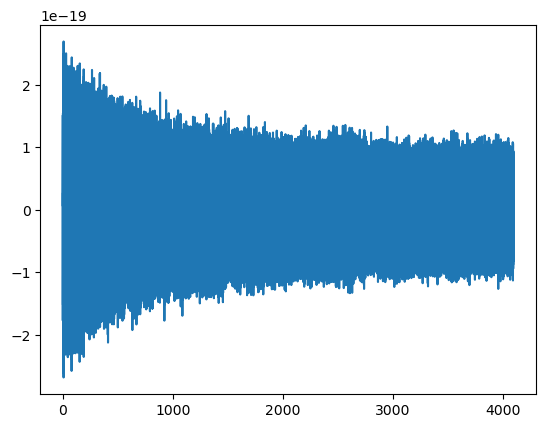

In [2]:
from pycbc.frame import read_frame
import matplotlib.pyplot as plt
from pycbc.filter import highpass, matched_filter
from pycbc.psd import interpolate
from pycbc.waveform import get_td_waveform
from pycbc.vetoes import power_chisq
from pycbc.events.ranking import newsnr


h1 = read_frame('/Users/ngalanis/Documents/GW_Data_Workshop/challenge3.gwf', 'H1:CHALLENGE3')

print(h1.sample_rate)
print(h1.duration)

h1 = highpass(h1, 15)
h1 = h1.crop(2,2)

plt.plot(h1.sample_times, h1)
plt.show()

(20, 1024)

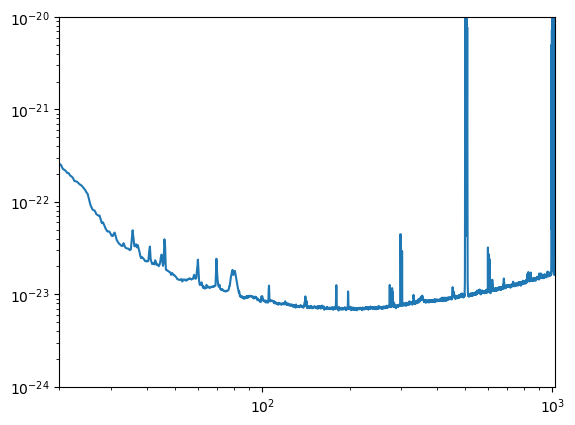

In [3]:
h1psd = h1.psd(4)**0.5
h1psd = interpolate(h1psd, h1.delta_f)

plt.plot(h1psd.sample_frequencies, h1psd)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-24,1e-20])
plt.xlim([20, 1024])

4096.0
4096.0


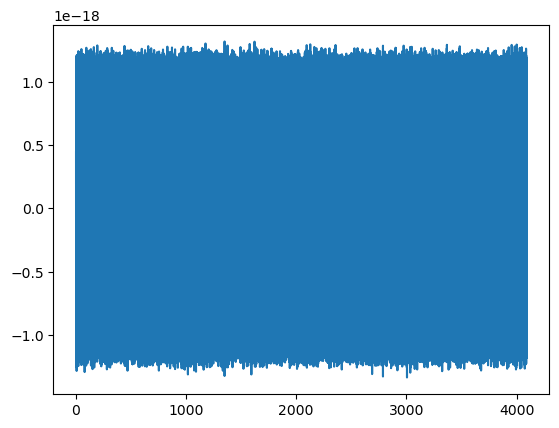

In [4]:
l1 = read_frame('/Users/ngalanis/Documents/GW_Data_Workshop/challenge3.gwf', 'L1:CHALLENGE3')

print(l1.sample_rate)
print(l1.duration)

l1 = highpass(l1, 15)
l1 = l1.crop(2,2)

plt.plot(l1.sample_times, l1)
plt.show()

(20, 1024)

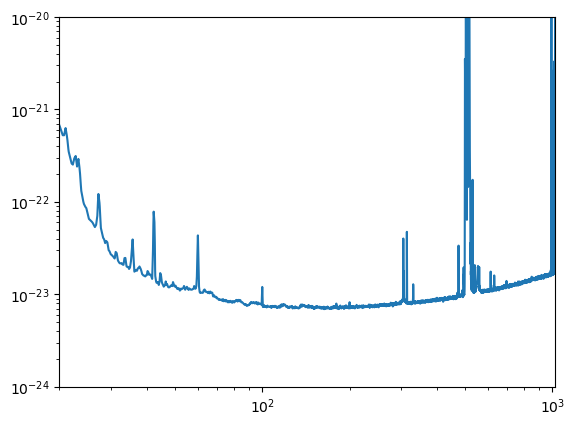

In [5]:
l1psd = l1.psd(4)**0.5
l1psd = interpolate(l1psd, l1.delta_f)


plt.plot(l1psd.sample_frequencies, l1psd)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-24,1e-20])
plt.xlim([20, 1024])

In [15]:
h_snr=[]
h_times=[]
l_snr=[]
l_times=[]

nbins = 26
masses=np.arange(10,51,2)

for m in masses:

    hp, _ = get_td_waveform(approximant='SEOBNRv4_opt', mass1=m, mass2=m, delta_t=h1.delta_t, f_lower=20)
    hp.resize(len(h1))

    h1snr = matched_filter(hp, h1, psd=h1psd, low_frequency_cutoff=20)
    h1snr = h1snr.crop(30,20)

    h1chisq = power_chisq(hp, h1, nbins, h1psd, low_frequency_cutoff=20)
    h1chisq = h1chisq.crop(30, 20)
    h1chisq = h1chisq/(2*nbins-2)

    nh1snr = newsnr(abs(h1snr), h1chisq)

    h_snr.append(nh1snr.max()/nh1snr.std())

    h_times.append(h1snr.sample_times[nh1snr.argmax()]-hp.sample_times[0])


    l1snr = matched_filter(hp, l1, psd=l1psd, low_frequency_cutoff=20)
    l1snr = l1snr.crop(30,20)

    l1chisq = power_chisq(hp, l1, nbins, l1psd, low_frequency_cutoff=20)
    l1chisq = l1chisq.crop(30, 20)
    l1chisq = l1chisq/(2*nbins-2)

    nl1snr = newsnr(abs(l1snr), l1chisq)

    l_snr.append(nl1snr.max()/nl1snr.std())

    l_times.append(l1snr.sample_times[nl1snr.argmax()]-hp.sample_times[0])
print(h_snr)
print(h_times)
print(l_snr)
print(l_times)

[45.92226072552987]
[1204.7081680275]
[57.55456235228715]
[1204.7081680275]


1204.701013181625


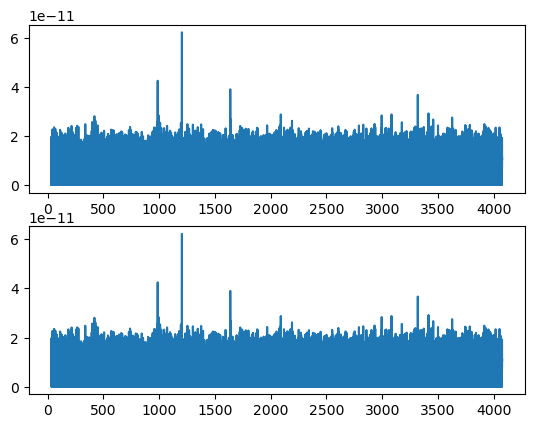

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1)

nbins = 26
m=40

hp, _ = get_td_waveform(approximant='SEOBNRv4_opt', mass1=m, mass2=m, delta_t=h1.delta_t, f_lower=20)
hp.resize(len(h1))

h1snr = matched_filter(hp, h1, psd=h1psd, low_frequency_cutoff=20)
h1snr = h1snr.crop(30,20)

h1chisq = power_chisq(hp, h1, nbins, h1psd, low_frequency_cutoff=20)
h1chisq = h1chisq.crop(30, 20)
h1chisq = h1chisq/(2*nbins-2)

nh1snr = newsnr(abs(h1snr), h1chisq)

print(h1snr.sample_times[nh1snr.argmax()]-hp.sample_times[0])
ax1.plot(h1snr.sample_times, abs(h1snr))
ax2.plot(h1snr.sample_times, nh1snr)
plt.show()

1204.701013181625


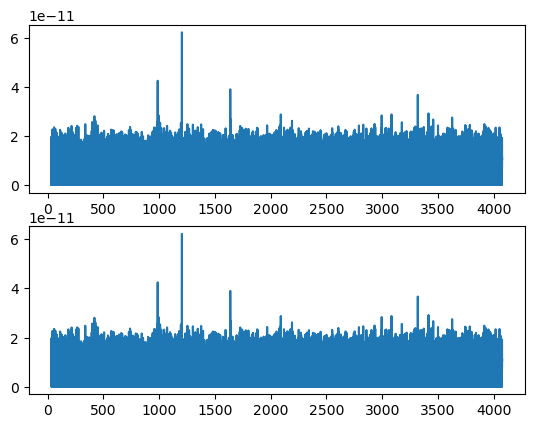

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1)

l1snr = matched_filter(hp, l1, psd=l1psd, low_frequency_cutoff=20)
l1snr = l1snr.crop(30,20)

l1chisq = power_chisq(hp, l1, nbins, l1psd, low_frequency_cutoff=20)
l1chisq = l1chisq.crop(30, 20)
l1chisq = l1chisq/(2*nbins-2)

nl1snr = newsnr(abs(l1snr), l1chisq)

print(l1snr.sample_times[nl1snr.argmax()]-hp.sample_times[0])
ax1.plot(h1snr.sample_times, abs(h1snr))
ax2.plot(h1snr.sample_times, nh1snr)
plt.show()

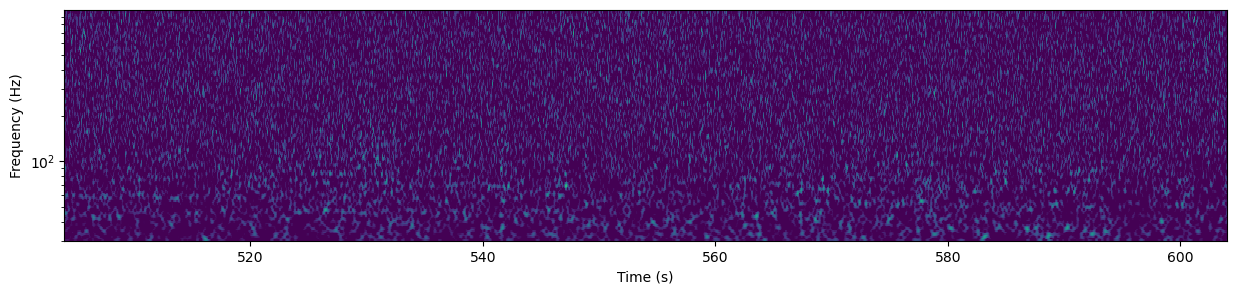

In [36]:
duration = 600
start = 500

h1white = h1.whiten(4,4)

t, f, q = h1white[int(start*h1white.sample_rate):int(duration*h1white.sample_rate)].qtransform(delta_t=0.01, frange=(30,1000))
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(t, f, q**0.5, vmin=1, vmax=6, shading='auto')
pylab.yscale('log')
pylab.xlabel('Time (s)')
#pylab.xlim(-16,-14)
pylab.ylabel('Frequency (Hz)')
pylab.show()

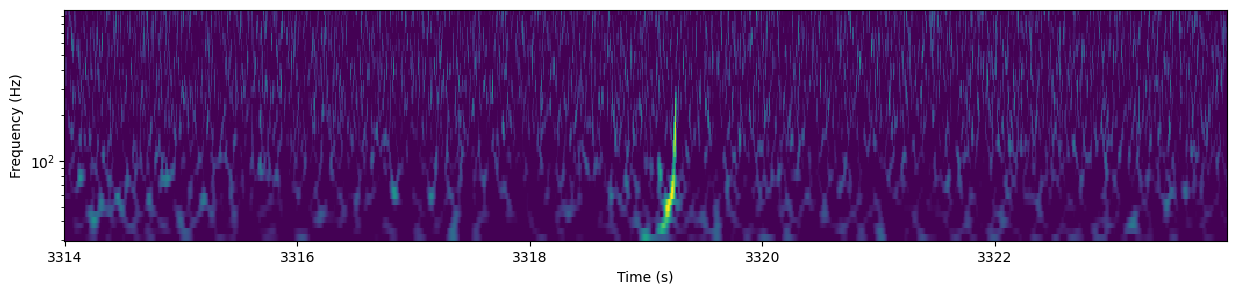

In [29]:
duration = 3320
start = 3310

l1white = l1.whiten(4,4)

t, f, q = l1white[int(start*l1white.sample_rate):int(duration*l1white.sample_rate)].qtransform(delta_t=0.01, frange=(30,1000))
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(t, f, q**0.5, vmin=1, vmax=6, shading='auto')
pylab.yscale('log')
pylab.xlabel('Time (s)')
#pylab.xlim(-16,-14)
pylab.ylabel('Frequency (Hz)')
pylab.show()